### 시계열 데이터 모듈

ACF plot과 PACF plot을 통해 모수를 추정하여 차분을 수행하여 분석하는 방법

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import exp_time_data

### 데이터 가져오기
> 이미 앞 예제를 통해 데이터가 비정상성임을 확인함

In [2]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx", index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 데이터 시각화

데이터의 패턴은 보이지만 비정상성임을 알 수 있다.

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
plt.figure()
sb.lineplot(data=df, y= "Passengers", x= "Month")
plt.grid()
plt.show()
plt.close()

NameError: name 'sb' is not defined

<Figure size 1000x500 with 0 Axes>

### 원본 데이터에 대한 ADF 테스트
ADF 테스트의 가설

|가설	|내용|
|---|---|
|귀무가설	|데이터가 정상성과 다르다 (=비정상성임을 의미)|
|대립가설|	데이터가 정상성이다.|

In [ ]:
ar = adfuller(df['Passengers'])
print("ADF statistics: %f" % ar[0])
print('p-value: %f' % ar[1])
print('number of lags: %d' % ar[2])
print("number of observations: %d" % ar[3])
print("Critical Values: %f" % ar[5])
for key, value in ar[4].items():
    print('\t%s: %.3f' %(key, value))

ADF statistics: 0.815369
p-value: 0.991880
number of lags: 13
number of observations: 130
Critical Values: 996.692931
	1%: -3.482
	5%: -2.884
	10%: -2.579


(0.8153688792060352,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### 1차 차분 수행
날짜 데이터는 평균을 낼 수 없기 때문에 실 데이터만으로 차분을 수행해야 한다.

In [ ]:
diff = df['Passengers'].diff().dropna()
diff

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 143, dtype: float64

### 차분 결과 시각화

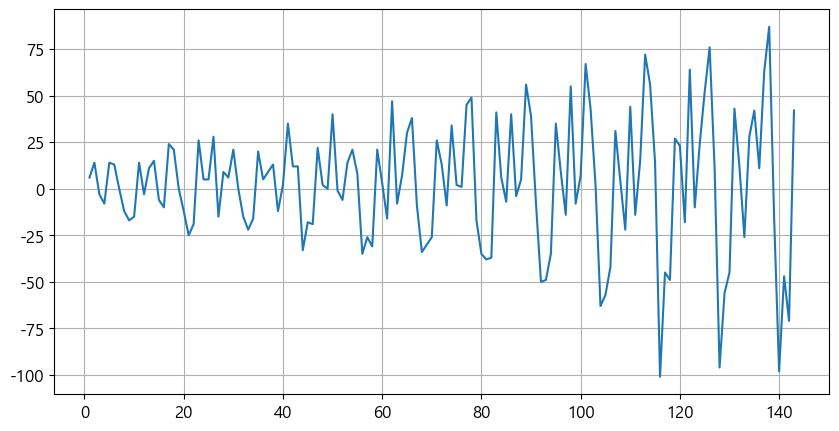

In [ ]:
plt.figure()
sb.lineplot(x=diff.index, y = diff.values)
plt.grid()
plt.show()
plt.close()

평균은 0으로 일정해 지는것으로 보이나 뒤로 갈 수록 점점 간격이 커지는 것으로 보아 아직 분산은 일정하지 않는것으로 여겨짐

즉, 아직은 정상성을 갖는다고 보기 어렵다.

## 02. ACF, PACF 검정

정상 시계열 데이터의 경우, ACF는 상대적으로 빠르게 0(상관관계 0)에 접근한다.

비정상 시계열 데이터의 경우, ACF는 천천히 감소하며 종종 큰 양의 값을 갖는다.

|구분|$ AR(p)$모델 적합	| $MA(q)$모델 적합|
|:---:|:---:|:---:|
ACF plot	|천천히 감소|첫 값으로부터 q개 뒤에 끊긴다.	|
PACF plot| 	첫 값으로부터 p개 뒤에 끊긴다.| 천천히 감소|

#### ACF Plot

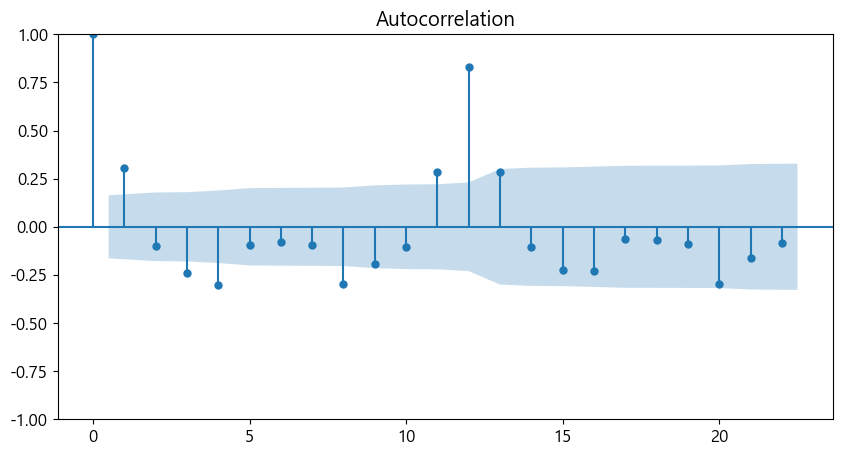

In [ ]:
plot_acf(diff)
plt.show()
plt.close()


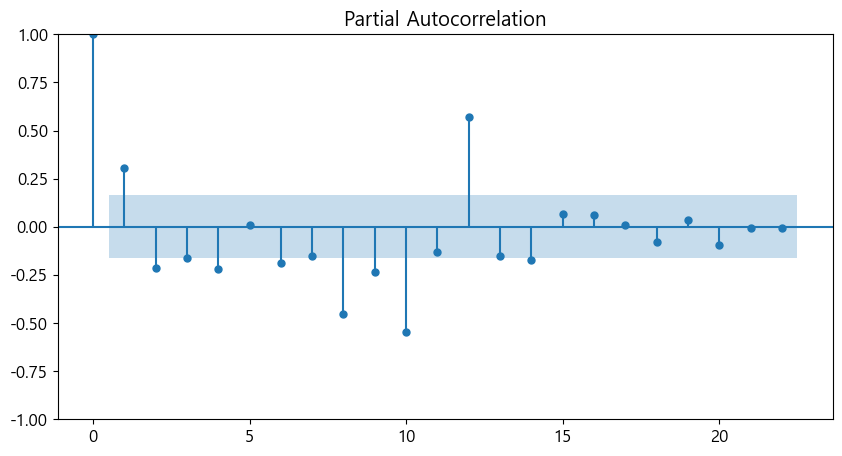

In [ ]:
plot_pacf(diff)
plt.show()
plt.close()

ACF 그래프와 PACF 그래프가 0으로 수렴하지 않으므로, 시계열 데이터가 정상성을 갖고 있지않다고 해석할 수 있다. 따라서 우리는 2차 차분을 진행해야한다.

In [ ]:
ar = adfuller(diff)
print("ADF statistics: %f" % ar[0])
print('p-value: %f' % ar[1])
print('number of lags: %d' % ar[2])
print("number of observations: %d" % ar[3])
print("Critical Values: %f" % ar[5])
for key, value in ar[4].items():
    print('\t%s: %.3f' %(key, value))

ADF statistics: -2.829267
p-value: 0.054213
number of lags: 12
number of observations: 130
Critical Values: 988.506932
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
diff2= df['Passengers'].diff().diff().dropna()
diff2

2        8.0
3      -17.0
4       -5.0
5       22.0
6       -1.0
       ...  
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: Passengers, Length: 142, dtype: float64

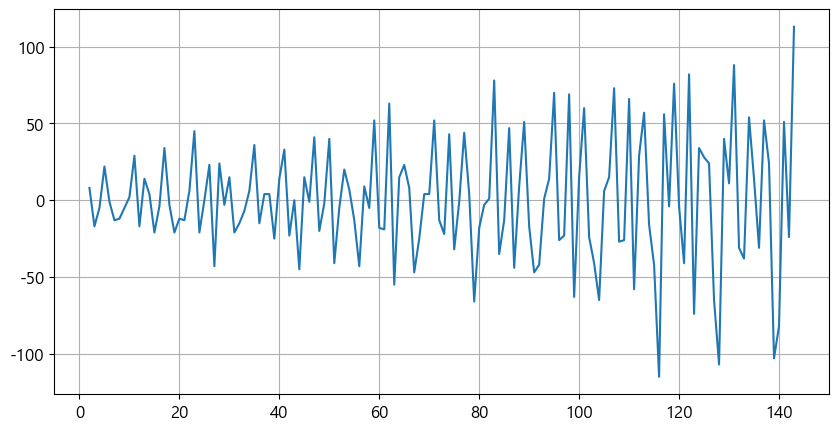

In [ ]:
plt.figure()
sb.lineplot(x=diff2.index, y = diff2.values)
plt.grid()
plt.show()
plt.close()

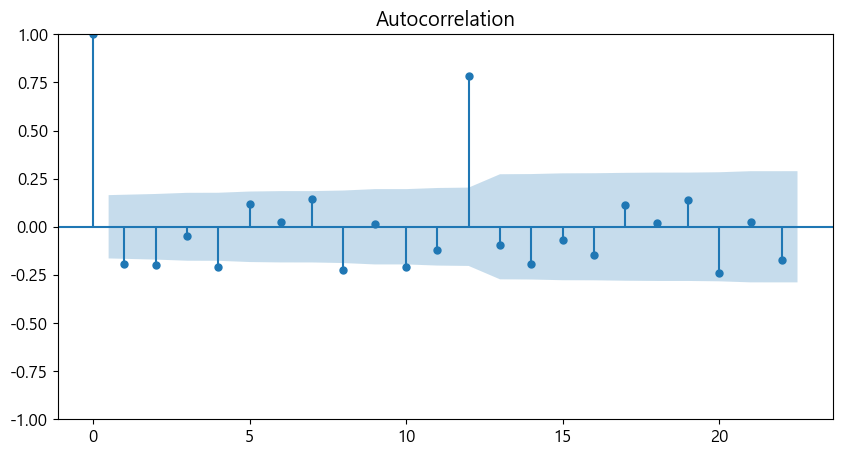

In [ ]:
plot_acf(diff2)
plt.show()
plt.close()

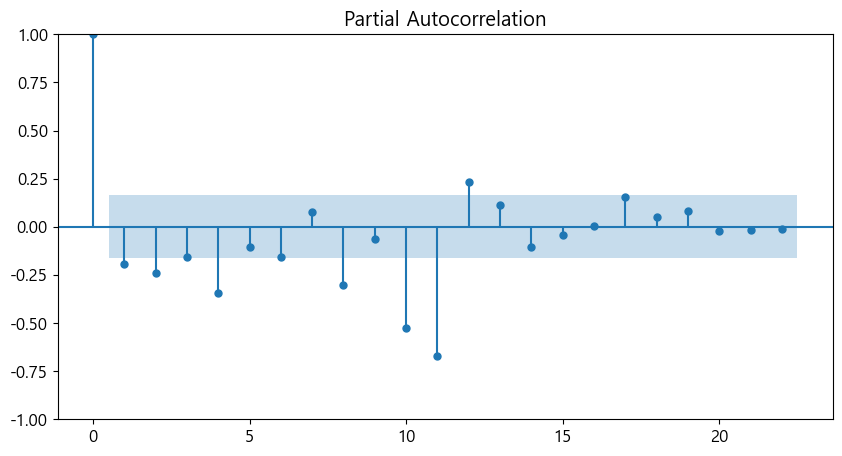

In [ ]:
plot_pacf(diff2)
plt.show()
plt.close()

In [ ]:
ar = adfuller(diff2)
print("ADF statistics: %f" % ar[0])
print('p-value: %f' % ar[1])
print('number of lags: %d' % ar[2])
print("number of observations: %d" % ar[3])
print("Critical Values: %f" % ar[5])
for key, value in ar[4].items():
    print('\t%s: %.3f' %(key, value))

ADF statistics: -16.384232
p-value: 0.000000
number of lags: 11
number of observations: 130
Critical Values: 988.602042
	1%: -3.482
	5%: -2.884
	10%: -2.579


Times-Series Data가 stationary 하지만 여전히 acf 와 pacf 그래프에서 significant spikes가 관측되는 것으로 보아 seasonality가 있다고 판단하여 seasonal difference를 이용하는 것으로 판단.

계절성 주기는 1년의 달의 개수인 12입니다.

In [ ]:
data_transformed = np.log(df['Passengers']).diff().diff(12).dropna()
data_transformed

13     0.039164
14     0.000361
15    -0.020496
16    -0.012939
17     0.066148
         ...   
139   -0.045934
140    0.012024
141    0.031830
142   -0.050082
143   -0.009964
Name: Passengers, Length: 131, dtype: float64

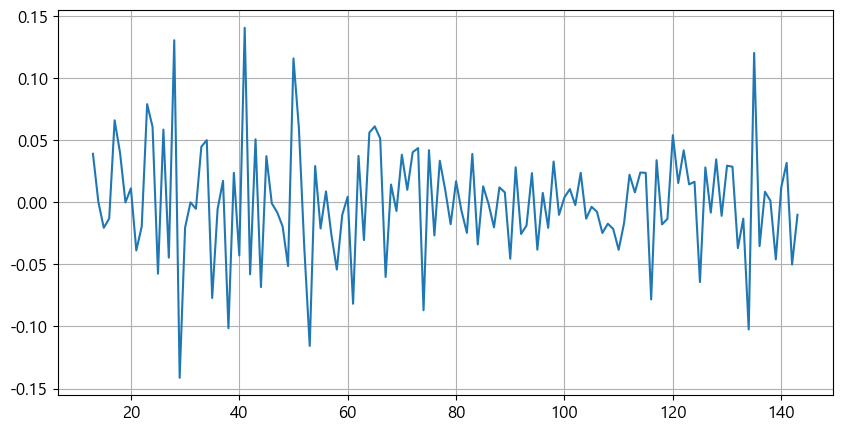

In [ ]:
plt.figure()
sb.lineplot(x=data_transformed.index, y = data_transformed.values)
plt.grid()
plt.show()
plt.close()

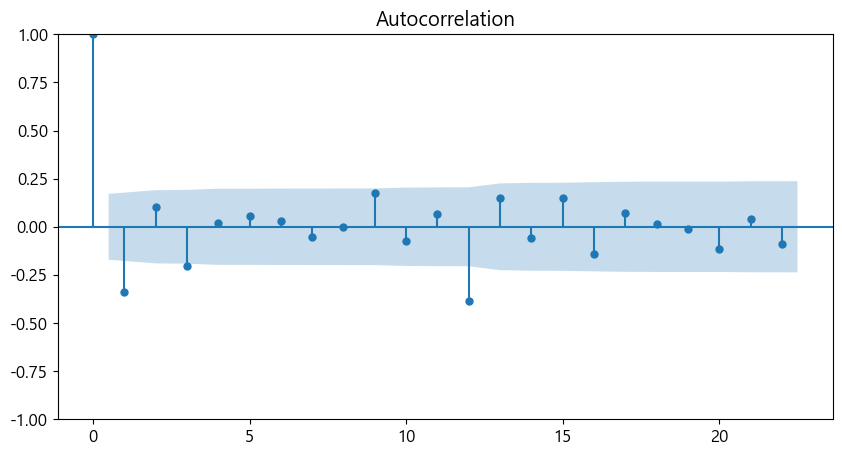

In [ ]:
plot_acf(data_transformed)
plt.show()
plt.close()

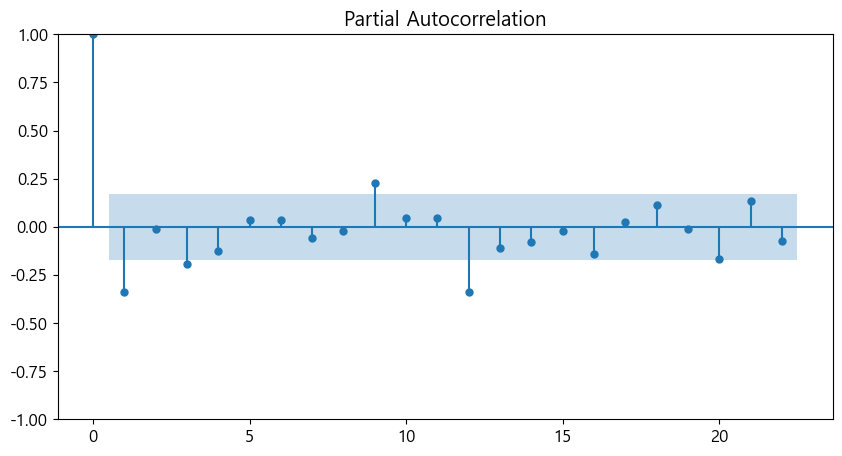

In [ ]:
plot_pacf(data_transformed)
plt.show()
plt.close()

In [ ]:
ar = adfuller(data_transformed)
print("ADF statistics: %f" % ar[0])
print('p-value: %f' % ar[1])
print('number of lags: %d' % ar[2])
print("number of observations: %d" % ar[3])
print("Critical Values: %f" % ar[5])
for key, value in ar[4].items():
    print('\t%s: %.3f' %(key, value))

ADF statistics: -4.443325
p-value: 0.000249
number of lags: 12
number of observations: 118
Critical Values: -415.559753
	1%: -3.487
	5%: -2.886
	10%: -2.580


p value가 0.05보다 작기 때문에, 데이터가 정상성이 없다는 귀무가설을 기각하고 시계열 데이터가 정상성이 있다는 대립가설을 채택할 수 있다.

ACF와 PACF 플롯에서 둘다 lag 1을 기점으로 유의한 자기상관이 없다는 것을 확인했기 떄문에 AR(1) 모델을 사용하는 것으로 한다.

AR(1) 모델은 시계열의 현재 값이 직전 값에 선형적으로 의존한다.

In [ ]:
model = ARIMA(data_transformed, order=(1,1,0))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  131
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 190.343
Date:                Thu, 03 Aug 2023   AIC                           -376.686
Time:                        15:15:36   BIC                           -370.951
Sample:                             0   HQIC                          -374.356
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6641      0.062    -10.748      0.000      -0.785      -0.543
sigma2         0.0031      0.000      9.483      0.000       0.002       0.004
Ljung-Box (L1) (Q):                   5.04   Jarque-

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
restored_series = fit.predict().cumsum()
restored_series = 

13     115.000000
14     115.039164
15     115.065294
16     115.058649
17     115.040691
          ...    
139    115.125326
140    115.110810
141    115.084345
142    115.103022
143    115.107337
Name: predicted_mean, Length: 131, dtype: float64

In [ ]:
start_index = 0
end_index = len(df['Passengers'])
np.exp(fit.predict().shift(12))
# pd = fit.predict(start=start_index, end=end_index)
# pd = np.exp(pd)
# pd

13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
         ...   
139    0.967369
140    1.016086
141    1.006210
142    1.019613
143    1.002754
Name: predicted_mean, Length: 131, dtype: float64

In [ ]:
fc = fit.forecast(10)
fc

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


131   -0.036606
132   -0.018913
133   -0.030663
134   -0.022860
135   -0.028042
136   -0.024601
137   -0.026886
138   -0.025368
139   -0.026376
140   -0.025707
Name: predicted_mean, dtype: float64

In [ ]:

x = list(range(0, len(df), 20))
x

[0, 20, 40, 60, 80, 100, 120, 140]

In [ ]:
xlabels = []

for i in x:
    xlabels.append(df.loc[i, 'Month'].strftime('%Y-%m-%d'))

xlabels

['1949-01-01',
 '1950-09-01',
 '1952-05-01',
 '1954-01-01',
 '1955-09-01',
 '1957-05-01',
 '1959-01-01',
 '1960-09-01']

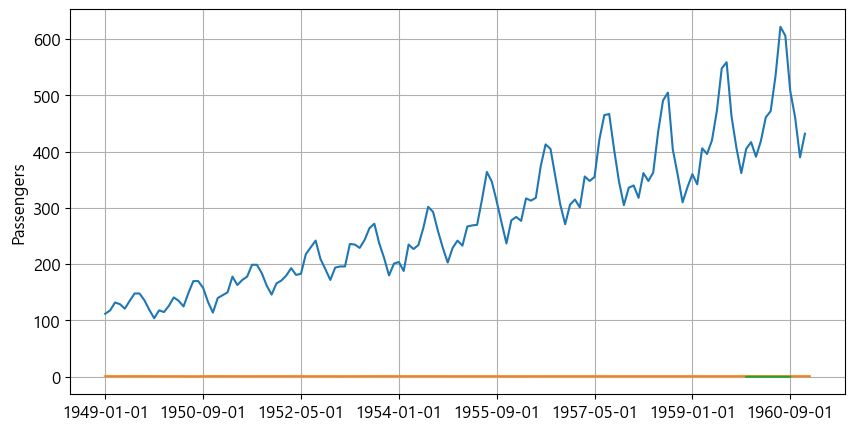

In [ ]:
plt.figure()
sb.lineplot(x=df.index, y=df['Passengers']) # 원본
sb.lineplot(x=pd.index, y=pd)           # 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=fc.index, y=fc)           # 이후 10단계를 예측한 값

plt.xticks(x, xlabels, rotation=0)

plt.grid()
plt.show()
plt.close()